In [12]:
from netCDF4 import Dataset
from scipy.interpolate import griddata
import pyproj as proj
import numpy as np

args = proj.Proj(proj="aeqd", lat_0=90, lon_0=0, datum="WGS84", units="m")

crs_wgs = proj.Proj(init='epsg:4326')  # assuming you're using WGS84 geographic

In [13]:
def regrid(data_in,
           lon_in,
           lat_in,
           lon_out,
           lat_out,
           method='nearest'):

    xout, yout = proj.transform(crs_wgs, args, np.array(lon_out),np.array(lat_out))

    xin, yin = proj.transform(crs_wgs, args, np.array(lon_in),np.array(lat_in))

    output = griddata((xin.ravel(),yin.ravel()),
                    np.array(data_in).ravel(),
                    (xout,yout),
                    method=method)
    
    return(output)

In [14]:
def import_envisat_field(year,
                         month):
    
    data_dir = f'/media/robbie/Seagate Portable Drive/Envisat_thickness/{year}/'
    file = f'ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-{year}{month}-fv2.0.nc'
    data = Dataset(data_dir+file)
    
    return(data)

# Import data

data = import_envisat_field("2003","02")

In [15]:
class my_mask:
    pass
import mask

my_mask.values = mask.get('mask')
my_mask.lon = mask.get('lon')
my_mask.lat = mask.get('lat')

envi_data = import_envisat_field("2003","02")

new = regrid(envi_data['sea_ice_thickness'][0],envi_data['lon'],envi_data['lat'],my_mask.lon,my_mask.lat)

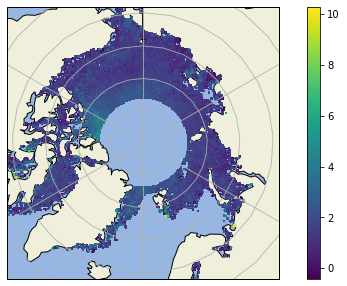

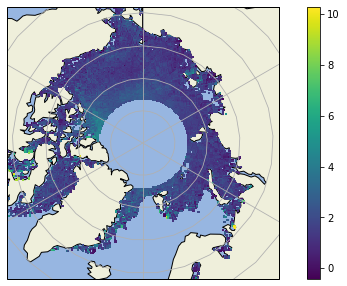

In [17]:
from cartoplot import cartoplot


cartoplot(my_mask.lon,my_mask.lat,new)

cartoplot(envi_data['lon'],envi_data['lat'],envi_data['sea_ice_thickness'][0])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import imageio
from netCDF4 import Dataset
import pickle

def get(string):
    """
                    "Lakes":0,
                    "Oceans":1,
                    "Okhotsk":2,
                    "Bering":3,
                    "Hudson":4,
                    "St Lawrence":5,
                    "Baffin":6,
                    "Greenland":7,
                    "Barents":8,
                    "Kara":9,
                    "Laptev":10,
                    "East Siberian":11,
                    "Chukchi":12,
                    "Beaufort":13,
                    "Canadian Archipelago":14,
                    "Central Arctic":15,
                    "Land":20,
                    "Coast":21}
    """
    path_grid = "/home/robbie/Dropbox/Data/grid.nc"

    if string == 'lon':
        grid_data = Dataset(path_grid)
        lon = np.array(grid_data.variables["lon"])
        return(lon)
    elif string == 'lat':
        grid_data = Dataset(path_grid)
        lat = np.array(grid_data.variables["lat"])
        return(lat)
    elif string == 'mask':
        im = imageio.imread('/home/robbie/Dropbox/Data/J_Mask.tif')
        mask = np.flipud(np.array(im))
        return(mask)

def EASE():
    """
                    "Lakes":0,
                    "Oceans":1,
                    "Okhotsk":2,
                    "Bering":3,
                    "Hudson":4,
                    "St Lawrence":5,
                    "Baffin":6,
                    "Greenland":7,
                    "Barents":8,
                    "Kara":9,
                    "Laptev":10,
                    "East Siberian":11,
                    "Chukchi":12,
                    "Beaufort":13,
                    "Canadian Archipelago":14,
                    "Central Arctic":15,
                    "Land":20,
                    "Coast":21}
    """
    mask = pickle.load( open( "/home/robbie/Dropbox/Code/mask_348x348.p", "rb" ) )
    return(mask)

def OSISAF():
    """
                    "Lakes":0,
                    "Oceans":1,
                    "Okhotsk":2,
                    "Bering":3,
                    "Hudson":4,
                    "St Lawrence":5,
                    "Baffin":6,
                    "Greenland":7,
                    "Barents":8,
                    "Kara":9,
                    "Laptev":10,
                    "East Siberian":11,
                    "Chukchi":12,
                    "Beaufort":13,
                    "Canadian Archipelago":14,
                    "Central Arctic":15,
                    "Land":20,
                    "Coast":21}
    """
    mask = pickle.load( open( "/home/robbie/Dropbox/Code/mask_1120x760.p", "rb" ) )
    return(mask)

def plot(region_string):

    regions_dict = {"Lakes":0,
                    "Oceans":1,
                    "Okhotsk":2,
                    "Bering":3,
                    "Hudson":4,
                    "St Lawrence":5,
                    "Baffin":6,
                    "Greenland":7,
                    "Barents":8,
                    "Kara":9,
                    "Laptev":10,
                    "East Siberian":11,
                    "Chukchi":12,
                    "Beaufort":13,
                    "Canadian Archipelago":14,
                    "Central Arctic":15,
                    "Land":20,
                    "Coast":21}

    code = regions_dict[region_string]

    fig = plt.figure(figsize=(10, 8))
    m = Basemap(projection='npstere',boundinglat=50,lon_0=360,resolution='l')
    m.drawcoastlines(linewidth=0.5)

    m.pcolormesh(get('lon'), get('lat'), get('mask'), latlon=True,cmap='plasma',vmax=code+1,vmin=code-1)